In [1]:
# 🔧 Google Colab Setup - Run this cell first!
print("🚀 Setting up Mathematical Prerequisites environment...")

# Install required packages for mathematical computations
!pip install numpy --quiet
!pip install matplotlib --quiet
!pip install seaborn --quiet
!pip install scipy --quiet

print("✅ Mathematical packages installed successfully!")

# Import all necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.linalg import eig, eigvals
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Configure plotting for optimal Colab display
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("📊 Mathematical libraries configured successfully!")
print("🎉 Setup complete! Ready to explore mathematical prerequisites for RL!")

🚀 Setting up Mathematical Prerequisites environment...
✅ Mathematical packages installed successfully!
📊 Mathematical libraries configured successfully!
🎉 Setup complete! Ready to explore mathematical prerequisites for RL!


Vector Norms and Cauchy-Schwarz Inequality
Vectors:
x = [ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337]
y = [-0.23413696  1.57921282  0.76743473 -0.46947439  0.54256004]

Norms of vector x:
||x||_1 (L1 norm) = 3.0399
||x||_2 (L2 norm) = 1.7492
||x||_∞ (L∞ norm) = 1.5230

Cauchy-Schwarz Inequality:
|⟨x, y⟩| = |-0.6797| = 0.6797
||x||_2 * ||y||_2 = 1.7492 * 1.9111 = 3.3430
Inequality satisfied: 0.6797 ≤ 3.3430 ? True
Ratio: 0.2033 (should be ≤ 1)



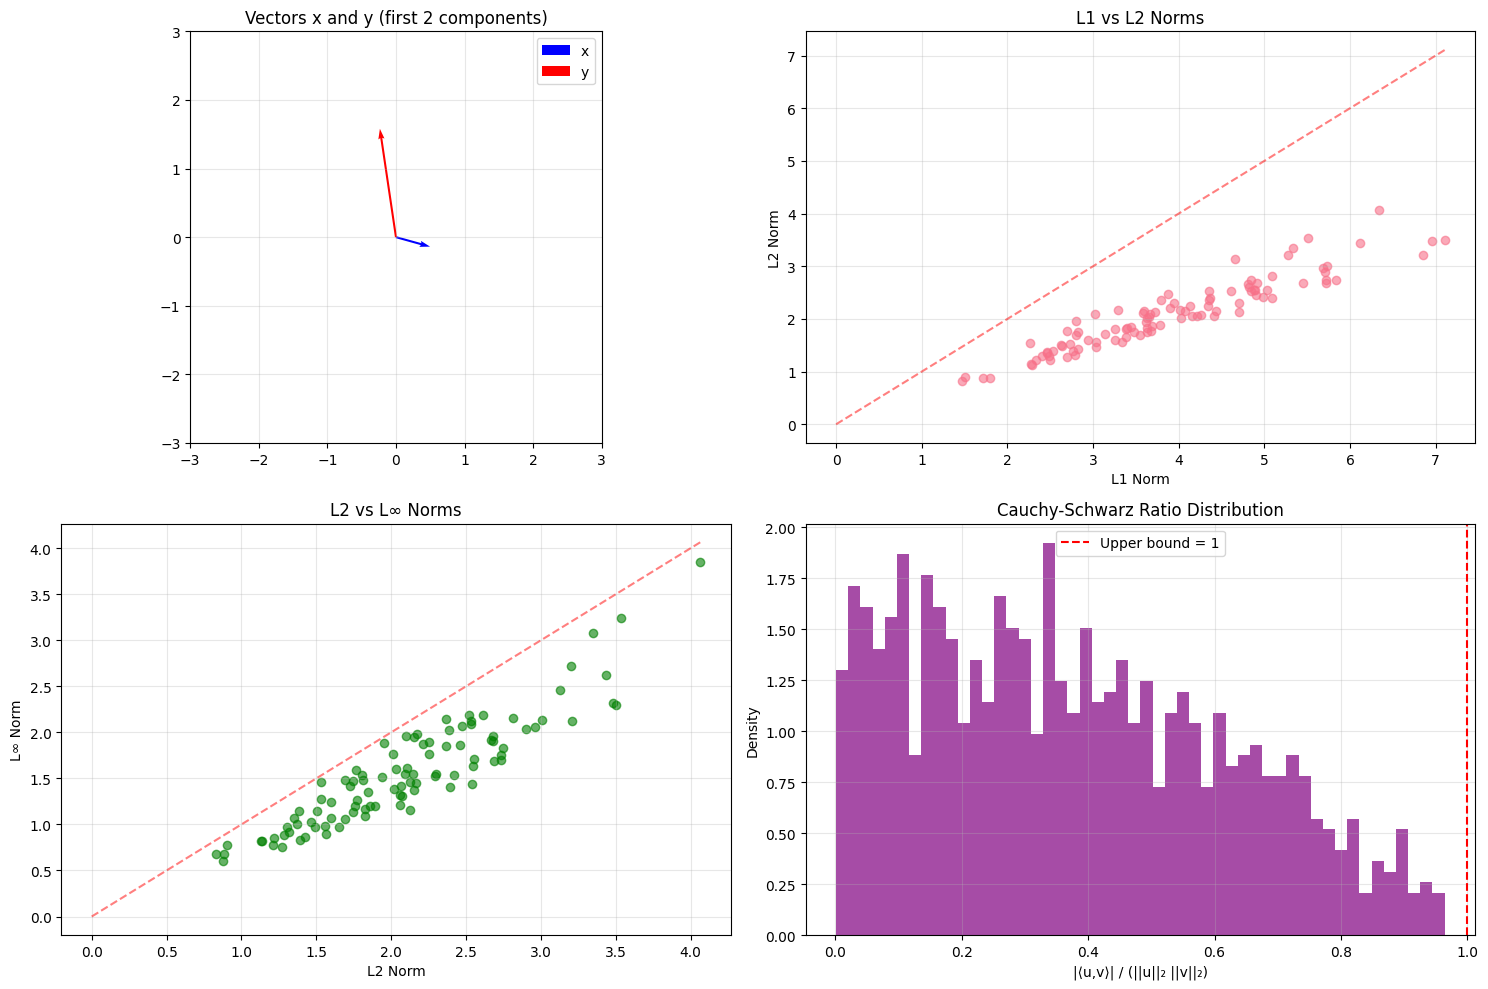

In [2]:
def demonstrate_vector_norms_and_cauchy_schwarz():
    """
    Demonstrate vector norms (L1, L2, L∞) and Cauchy-Schwarz inequality.
    """
    print("Vector Norms and Cauchy-Schwarz Inequality")
    print("=" * 50)

    # Generate random vectors
    np.random.seed(42)
    x = np.random.randn(5)
    y = np.random.randn(5)

    print("Vectors:")
    print(f"x = {x}")
    print(f"y = {y}")
    print()

    # Compute different norms
    l1_norm_x = np.linalg.norm(x, 1)
    l2_norm_x = np.linalg.norm(x, 2)
    linf_norm_x = np.linalg.norm(x, np.inf)

    print("Norms of vector x:")
    print(f"||x||_1 (L1 norm) = {l1_norm_x:.4f}")
    print(f"||x||_2 (L2 norm) = {l2_norm_x:.4f}")
    print(f"||x||_∞ (L∞ norm) = {linf_norm_x:.4f}")
    print()

    # Demonstrate Cauchy-Schwarz inequality
    dot_product = np.dot(x, y)
    l2_norm_y = np.linalg.norm(y, 2)

    lhs = abs(dot_product)
    rhs = l2_norm_x * l2_norm_y

    print("Cauchy-Schwarz Inequality:")
    print(f"|⟨x, y⟩| = |{dot_product:.4f}| = {lhs:.4f}")
    print(f"||x||_2 * ||y||_2 = {l2_norm_x:.4f} * {l2_norm_y:.4f} = {rhs:.4f}")
    print(f"Inequality satisfied: {lhs:.4f} ≤ {rhs:.4f} ? {lhs <= rhs}")
    print(f"Ratio: {lhs/rhs:.4f} (should be ≤ 1)")
    print()

    # Visualization
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Plot vectors in 2D (using first 2 components)
    ax1.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1,
               color='blue', width=0.005, label='x')
    ax1.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1,
               color='red', width=0.005, label='y')
    ax1.set_xlim(-3, 3)
    ax1.set_ylim(-3, 3)
    ax1.grid(True, alpha=0.3)
    ax1.set_aspect('equal')
    ax1.legend()
    ax1.set_title('Vectors x and y (first 2 components)')

    # Compare different norms for multiple random vectors
    n_vectors = 100
    vectors = np.random.randn(n_vectors, 5)

    l1_norms = [np.linalg.norm(v, 1) for v in vectors]
    l2_norms = [np.linalg.norm(v, 2) for v in vectors]
    linf_norms = [np.linalg.norm(v, np.inf) for v in vectors]

    ax2.scatter(l1_norms, l2_norms, alpha=0.6, label='L1 vs L2')
    ax2.plot([0, max(l1_norms)], [0, max(l1_norms)], 'r--', alpha=0.5)
    ax2.set_xlabel('L1 Norm')
    ax2.set_ylabel('L2 Norm')
    ax2.set_title('L1 vs L2 Norms')
    ax2.grid(True, alpha=0.3)

    ax3.scatter(l2_norms, linf_norms, alpha=0.6, color='green', label='L2 vs L∞')
    ax3.plot([0, max(l2_norms)], [0, max(l2_norms)], 'r--', alpha=0.5)
    ax3.set_xlabel('L2 Norm')
    ax3.set_ylabel('L∞ Norm')
    ax3.set_title('L2 vs L∞ Norms')
    ax3.grid(True, alpha=0.3)

    # Cauchy-Schwarz ratio distribution
    cs_ratios = []
    for _ in range(1000):
        u = np.random.randn(5)
        v = np.random.randn(5)
        ratio = abs(np.dot(u, v)) / (np.linalg.norm(u, 2) * np.linalg.norm(v, 2))
        cs_ratios.append(ratio)

    ax4.hist(cs_ratios, bins=50, density=True, alpha=0.7, color='purple')
    ax4.axvline(1, color='red', linestyle='--', label='Upper bound = 1')
    ax4.set_xlabel('|⟨u,v⟩| / (||u||₂ ||v||₂)')
    ax4.set_ylabel('Density')
    ax4.set_title('Cauchy-Schwarz Ratio Distribution')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

demonstrate_vector_norms_and_cauchy_schwarz()

## 2. Linear Algebra <a id="linear-algebra"></a>

### Vector Norms and Cauchy-Schwarz Inequality

From the textbook: $|\langle x, y \rangle| \leq \|x\|_2 \|y\|_2$

Hoeffding's Inequality Demonstration
True mean μ = 0.5
Bounds: [0, 1]
Threshold t = 0.1
--------------------------------------------------
n=  10: Empirical P(|X̄-μ| ≥ 0.1) = 0.3030, Hoeffding bound = 1.6375
n=  50: Empirical P(|X̄-μ| ≥ 0.1) = 0.0160, Hoeffding bound = 0.7358
n= 100: Empirical P(|X̄-μ| ≥ 0.1) = 0.0020, Hoeffding bound = 0.2707
n= 500: Empirical P(|X̄-μ| ≥ 0.1) = 0.0000, Hoeffding bound = 0.0001
n=1000: Empirical P(|X̄-μ| ≥ 0.1) = 0.0000, Hoeffding bound = 0.0000


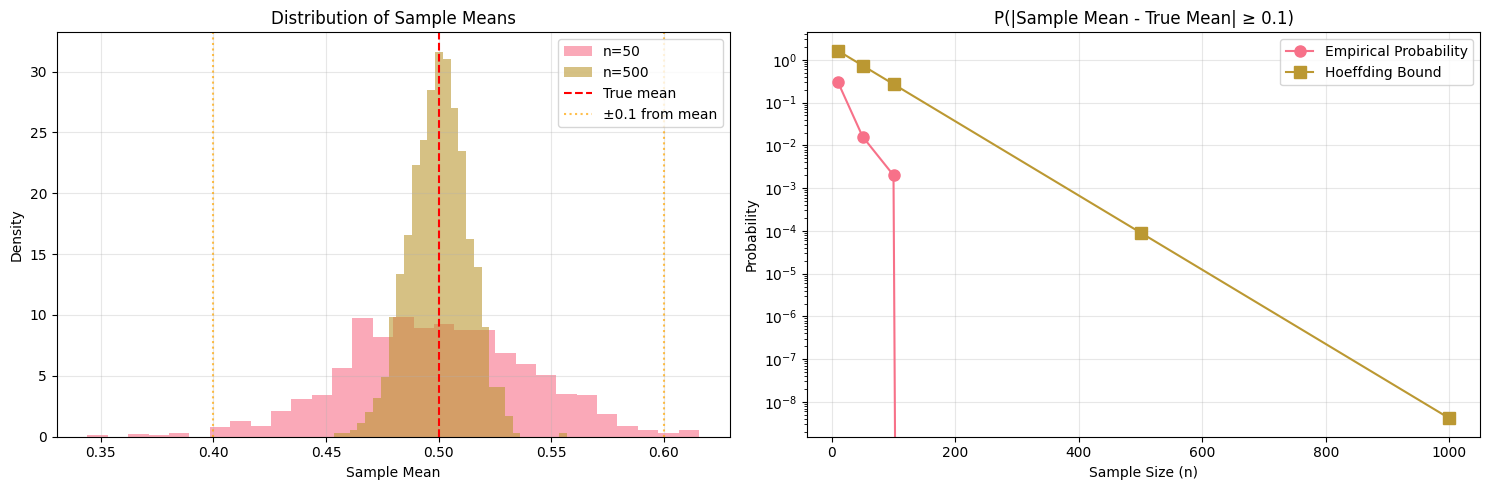


Key Insight: Hoeffding's inequality provides an upper bound that decreases exponentially with sample size.


In [3]:
def demonstrate_hoeffding_inequality():
    """
    Demonstrate Hoeffding's inequality for concentration of sample means.

    We'll use bounded uniform random variables and show how the sample mean
    concentrates around the true mean as predicted by Hoeffding's bound.
    """
    # Parameters
    a, b = 0, 1  # Bounds for uniform distribution
    true_mean = (a + b) / 2  # True mean = 0.5
    sample_sizes = [10, 50, 100, 500, 1000]
    n_experiments = 1000
    t = 0.1  # Deviation threshold

    print("Hoeffding's Inequality Demonstration")
    print(f"True mean μ = {true_mean}")
    print(f"Bounds: [{a}, {b}]")
    print(f"Threshold t = {t}")
    print("-" * 50)

    # Theoretical bound from Hoeffding's inequality
    def hoeffding_bound(n, t, a, b):
        return 2 * np.exp(-2 * n * t**2 / (b - a)**2)

    empirical_probs = []
    theoretical_bounds = []

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    for n in sample_sizes:
        # Generate many sample means
        sample_means = []
        for _ in range(n_experiments):
            samples = np.random.uniform(a, b, n)
            sample_means.append(np.mean(samples))

        sample_means = np.array(sample_means)

        # Empirical probability of deviation > t
        empirical_prob = np.mean(np.abs(sample_means - true_mean) >= t)
        empirical_probs.append(empirical_prob)

        # Theoretical bound
        theoretical_bound = hoeffding_bound(n, t, a, b)
        theoretical_bounds.append(theoretical_bound)

        print(f"n={n:4d}: Empirical P(|X̄-μ| ≥ {t}) = {empirical_prob:.4f}, "
              f"Hoeffding bound = {theoretical_bound:.4f}")

        # Plot sample means distribution for selected sample sizes
        if n in [50, 500]:
            ax1.hist(sample_means, bins=30, alpha=0.6, density=True,
                    label=f'n={n}')

    # Visualization
    ax1.axvline(true_mean, color='red', linestyle='--', label='True mean')
    ax1.axvline(true_mean + t, color='orange', linestyle=':', alpha=0.7)
    ax1.axvline(true_mean - t, color='orange', linestyle=':', alpha=0.7,
                label=f'±{t} from mean')
    ax1.set_xlabel('Sample Mean')
    ax1.set_ylabel('Density')
    ax1.set_title('Distribution of Sample Means')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Compare empirical vs theoretical bounds
    ax2.plot(sample_sizes, empirical_probs, 'o-', label='Empirical Probability',
             markersize=8)
    ax2.plot(sample_sizes, theoretical_bounds, 's-', label='Hoeffding Bound',
             markersize=8)
    ax2.set_xlabel('Sample Size (n)')
    ax2.set_ylabel('Probability')
    ax2.set_title(f'P(|Sample Mean - True Mean| ≥ {t})')
    ax2.set_yscale('log')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"\nKey Insight: Hoeffding's inequality provides an upper bound that "
          f"decreases exponentially with sample size.")

demonstrate_hoeffding_inequality()

### Concentration Inequalities: Hoeffding's Inequality

From the textbook: For bounded random variables, Hoeffding's inequality provides concentration bounds.

$P(|\bar{X}_n - \mu| \geq t) \leq 2\exp\left(-\frac{2n t^2}{(b-a)^2}\right)$

E[Grade|Study=Low] = 60.08
E[Grade|Study=Medium] = 75.05
E[Grade|Study=High] = 90.09

Direct E[X] = 73.52
E[E[X|Y]] = 73.52
Difference = 0.000000


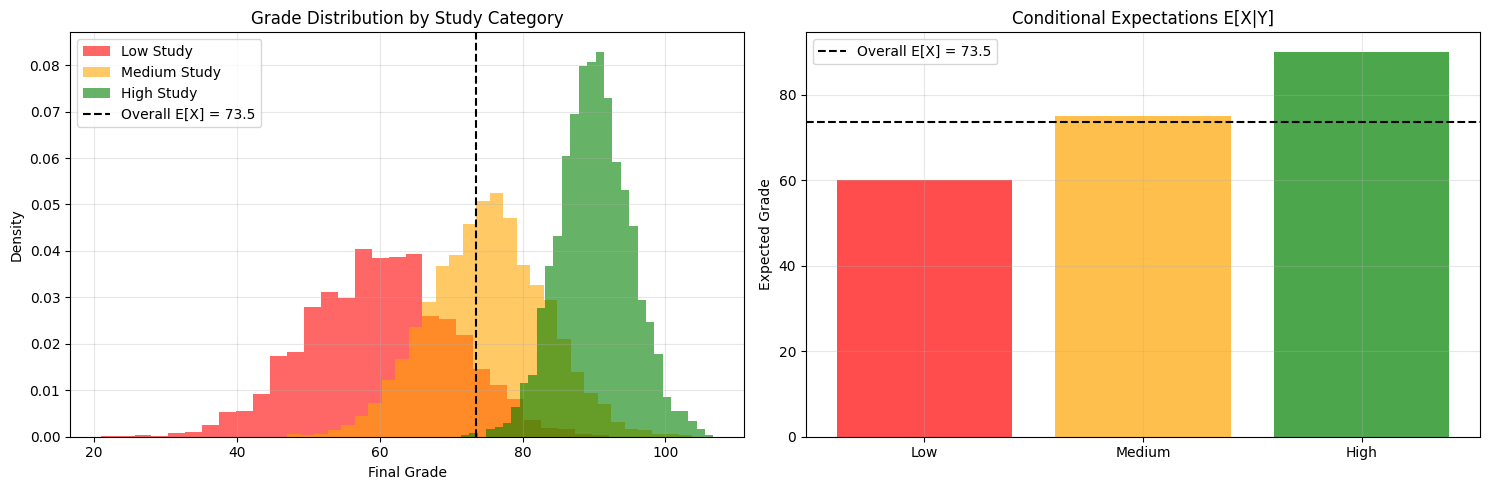

In [4]:
def demonstrate_law_of_total_expectation():
    """
    Demonstrate the Law of Total Expectation: E[X] = E[E[X|Y]]

    Example: X = student's final grade, Y = student's study hours category
    """
    n_samples = 10000

    # Generate Y: study hours category (0: low, 1: medium, 2: high)
    study_category = np.random.choice([0, 1, 2], size=n_samples, p=[0.3, 0.5, 0.2])

    # Generate X|Y: final grade depends on study category
    # Low study: mean=60, Medium study: mean=75, High study: mean=90
    final_grades = np.zeros(n_samples)
    for i in range(n_samples):
        if study_category[i] == 0:
            final_grades[i] = np.random.normal(60, 10)  # Low study
        elif study_category[i] == 1:
            final_grades[i] = np.random.normal(75, 8)   # Medium study
        else:
            final_grades[i] = np.random.normal(90, 5)   # High study

    # Direct computation of E[X]
    direct_expectation = np.mean(final_grades)

    # Compute E[X|Y] for each category
    conditional_expectations = []
    category_probs = []

    for category in [0, 1, 2]:
        mask = study_category == category
        if np.sum(mask) > 0:
            cond_exp = np.mean(final_grades[mask])
            prob = np.mean(mask)
            conditional_expectations.append(cond_exp)
            category_probs.append(prob)
            print(f"E[Grade|Study={['Low','Medium','High'][category]}] = {cond_exp:.2f}")

    # Compute E[E[X|Y]]
    law_of_total_exp = np.sum([ce * p for ce, p in zip(conditional_expectations, category_probs)])

    print(f"\nDirect E[X] = {direct_expectation:.2f}")
    print(f"E[E[X|Y]] = {law_of_total_exp:.2f}")
    print(f"Difference = {abs(direct_expectation - law_of_total_exp):.6f}")

    # Visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Plot grade distributions by study category
    categories = ['Low', 'Medium', 'High']
    colors = ['red', 'orange', 'green']

    for i, (category, color) in enumerate(zip(categories, colors)):
        mask = study_category == i
        ax1.hist(final_grades[mask], alpha=0.6, label=f'{category} Study',
                color=color, bins=30, density=True)

    ax1.axvline(direct_expectation, color='black', linestyle='--',
                label=f'Overall E[X] = {direct_expectation:.1f}')
    ax1.set_xlabel('Final Grade')
    ax1.set_ylabel('Density')
    ax1.set_title('Grade Distribution by Study Category')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Bar plot of conditional expectations
    ax2.bar(categories, conditional_expectations, color=colors, alpha=0.7)
    ax2.axhline(direct_expectation, color='black', linestyle='--',
                label=f'Overall E[X] = {direct_expectation:.1f}')
    ax2.set_ylabel('Expected Grade')
    ax2.set_title('Conditional Expectations E[X|Y]')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

demonstrate_law_of_total_expectation()

## 1. Probability Theory <a id="probability"></a>

### Conditional Expectation and Law of Total Expectation

From the textbook: $E[X] = E[E[X|Y]]$

Let's demonstrate this fundamental property with a concrete example.

Weather Markov Chain
Transition Matrix P:
 Sunny: [0.7 0.2 0.1]
Cloudy: [0.3 0.4 0.3]
 Rainy: [0.2 0.3 0.5]

Analytical stationary distribution: [0.45652174 0.2826087  0.26086957]
Eigenvector stationary distribution: [0.45652174 0.2826087  0.26086957]



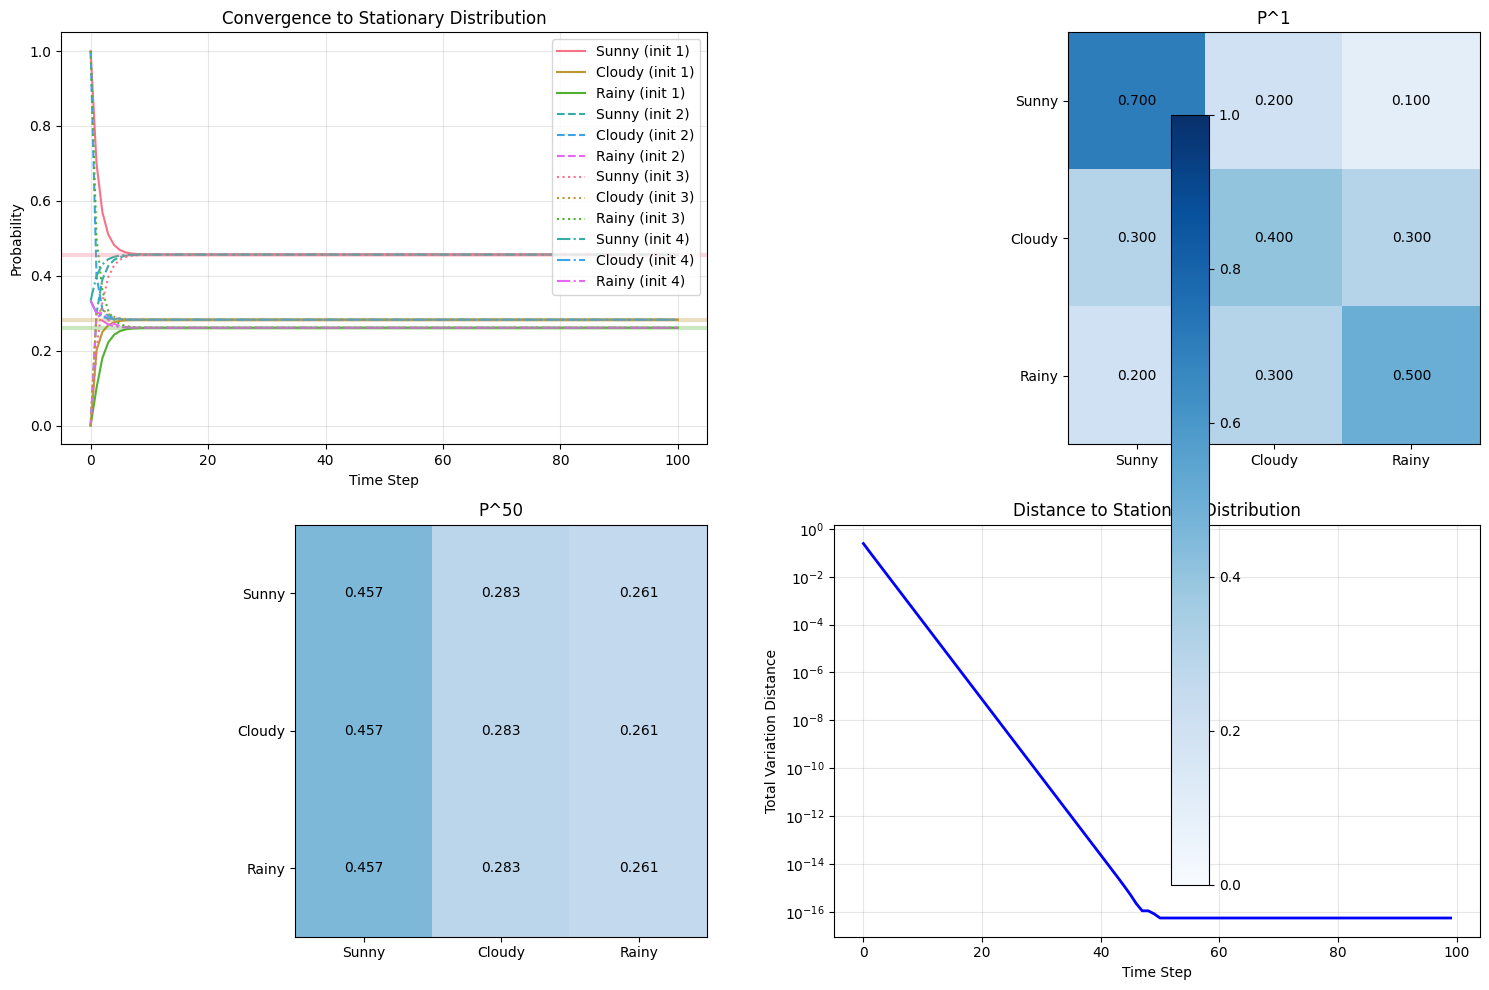

Mixing Times:
  t_mix(0.100) ≤ 3
  t_mix(0.010) ≤ 6
  t_mix(0.001) ≤ 9

Markov Chain Properties:
  Stochastic matrix: True
  Doubly stochastic: False
  Irreducible: True
  Aperiodic: True


In [5]:
def demonstrate_markov_chains():
    """
    Demonstrate Markov chain convergence to stationary distribution.

    We'll create a simple 3-state weather model and show convergence.
    """
    # Define transition matrix for weather states: [Sunny, Cloudy, Rainy]
    P = np.array([
        [0.7, 0.2, 0.1],  # From Sunny
        [0.3, 0.4, 0.3],  # From Cloudy
        [0.2, 0.3, 0.5]   # From Rainy
    ])

    states = ['Sunny', 'Cloudy', 'Rainy']
    n_states = len(states)

    print("Weather Markov Chain")
    print("Transition Matrix P:")
    for i, state in enumerate(states):
        print(f"{state:>6}: {P[i]}")
    print()

    # Find stationary distribution analytically
    # Solve π = πP and π·1 = 1
    A = np.vstack([P.T - np.eye(n_states), np.ones(n_states)])
    b = np.zeros(n_states + 1)
    b[-1] = 1

    pi_analytical = np.linalg.lstsq(A, b, rcond=None)[0]
    print(f"Analytical stationary distribution: {pi_analytical}")

    # Alternative: find stationary distribution as left eigenvector
    eigenvalues, left_eigenvectors = eig(P.T)
    stationary_idx = np.argmax(eigenvalues.real)
    pi_eigen = left_eigenvectors[:, stationary_idx].real
    pi_eigen = pi_eigen / np.sum(pi_eigen)  # Normalize
    print(f"Eigenvector stationary distribution: {pi_eigen}")
    print()

    # Simulate convergence
    n_steps = 100
    initial_distributions = [
        np.array([1.0, 0.0, 0.0]),  # Start sunny
        np.array([0.0, 1.0, 0.0]),  # Start cloudy
        np.array([0.0, 0.0, 1.0]),  # Start rainy
        np.array([1/3, 1/3, 1/3])   # Start uniform
    ]

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Plot convergence from different initial distributions
    for i, init_dist in enumerate(initial_distributions):
        distributions = [init_dist.copy()]
        current_dist = init_dist.copy()

        for step in range(n_steps):
            current_dist = current_dist @ P
            distributions.append(current_dist.copy())

        distributions = np.array(distributions)

        # Plot probability evolution
        for j, state in enumerate(states):
            ax1.plot(distributions[:, j], label=f'{state} (init {i+1})',
                    linestyle=['-', '--', ':', '-.'][i])

    # Add stationary distribution lines
    for j, state in enumerate(states):
        ax1.axhline(pi_analytical[j], color=f'C{j}', alpha=0.3, linewidth=3)

    ax1.set_xlabel('Time Step')
    ax1.set_ylabel('Probability')
    ax1.set_title('Convergence to Stationary Distribution')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Show matrix powers converging to rank-1 matrix
    power_steps = [1, 5, 10, 20, 50]
    P_powers = []

    for t in power_steps:
        P_t = np.linalg.matrix_power(P, t)
        P_powers.append(P_t)

        # Plot heatmap
        if t in [1, 50]:
            idx = 0 if t == 1 else 1
            ax = [ax2, ax3][idx]
            im = ax.imshow(P_t, cmap='Blues', vmin=0, vmax=1)
            ax.set_title(f'P^{t}')
            ax.set_xticks(range(n_states))
            ax.set_yticks(range(n_states))
            ax.set_xticklabels(states)
            ax.set_yticklabels(states)

            # Add text annotations
            for i in range(n_states):
                for j in range(n_states):
                    ax.text(j, i, f'{P_t[i,j]:.3f}',
                           ha='center', va='center', fontsize=10)

    plt.colorbar(im, ax=[ax2, ax3])

    # Show total variation distance convergence
    tv_distances = []
    current_dist = np.array([1.0, 0.0, 0.0])  # Start from one corner

    for step in range(n_steps):
        current_dist = current_dist @ P
        tv_distance = 0.5 * np.sum(np.abs(current_dist - pi_analytical))
        tv_distances.append(tv_distance)

    ax4.semilogy(tv_distances, 'b-', linewidth=2)
    ax4.set_xlabel('Time Step')
    ax4.set_ylabel('Total Variation Distance')
    ax4.set_title('Distance to Stationary Distribution')
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Demonstrate mixing time
    epsilon_values = [0.1, 0.01, 0.001]
    print("Mixing Times:")
    for eps in epsilon_values:
        for t in range(1, 100):
            P_t = np.linalg.matrix_power(P, t)
            max_tv = 0
            for i in range(n_states):
                tv = 0.5 * np.sum(np.abs(P_t[i, :] - pi_analytical))
                max_tv = max(max_tv, tv)

            if max_tv <= eps:
                print(f"  t_mix({eps:5.3f}) ≤ {t}")
                break

    # Check theoretical properties
    print(f"\nMarkov Chain Properties:")
    print(f"  Stochastic matrix: {np.allclose(np.sum(P, axis=1), 1)}")
    print(f"  Doubly stochastic: {np.allclose(np.sum(P, axis=0), 1)}")

    # Check if irreducible (all states communicate)
    P_large = np.linalg.matrix_power(P, n_states)
    irreducible = np.all(P_large > 0)
    print(f"  Irreducible: {irreducible}")

    # Check aperiodicity (gcd of return times = 1)
    aperiodic = np.all(np.diag(P) > 0)  # Simplified check
    print(f"  Aperiodic: {aperiodic}")

demonstrate_markov_chains()

## 4. Markov Chains <a id="markov-chains"></a>

### Stationary Distribution and Convergence

From the textbook: For irreducible, aperiodic Markov chains, π = πP and lim P^t = 1π^T.

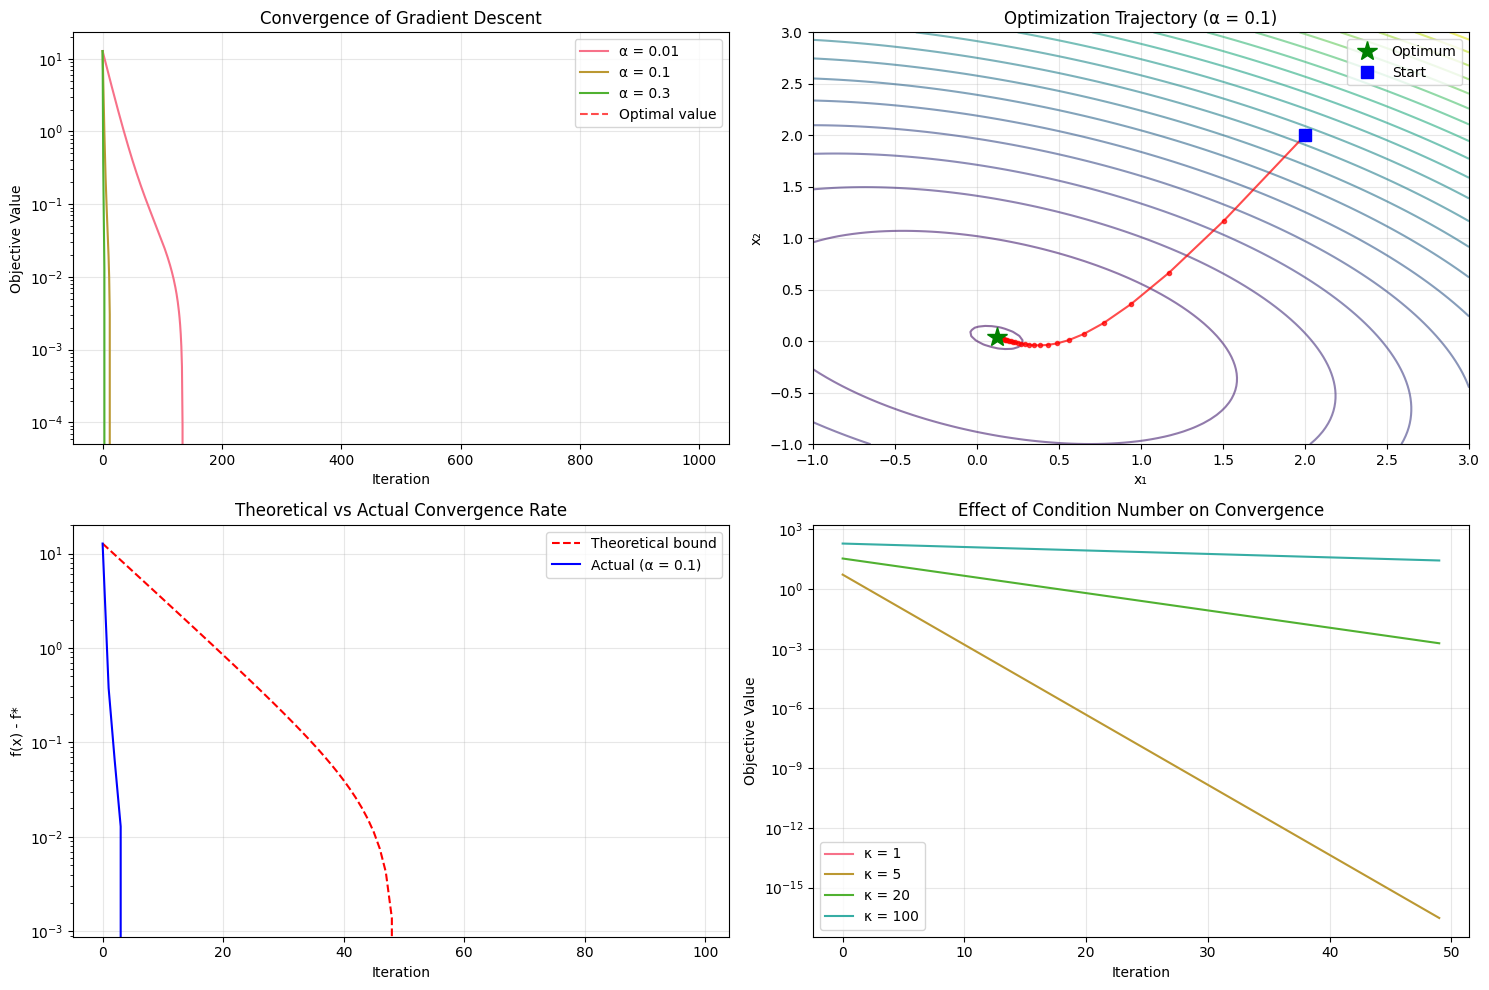

Optimal point: x* = [0.1201, 0.0371]
Optimal value: f* = -0.0184
Condition number of Q: 2.97


In [6]:
def demonstrate_gradient_descent():
    """
    Demonstrate gradient descent convergence on a convex quadratic function.

    We'll minimize f(x) = (1/2) * x^T * Q * x + b^T * x + c
    where Q is positive definite.
    """
    # Define a convex quadratic function
    n_dim = 2
    np.random.seed(42)
    A = np.random.randn(n_dim, n_dim)
    Q = A.T @ A + np.eye(n_dim)  # Ensure positive definite
    b = np.random.randn(n_dim)
    c = 0

    # Analytical solution
    x_optimal = -np.linalg.solve(Q, b)
    f_optimal = 0.5 * x_optimal.T @ Q @ x_optimal + b.T @ x_optimal + c

    def objective(x):
        return 0.5 * x.T @ Q @ x + b.T @ x + c

    def gradient(x):
        return Q @ x + b

    # Gradient descent with different step sizes
    step_sizes = [0.01, 0.1, 0.3]
    max_iterations = 1000

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    for i, alpha in enumerate(step_sizes):
        x = np.array([2.0, 2.0])  # Starting point
        trajectory = [x.copy()]
        objective_values = [objective(x)]

        for iteration in range(max_iterations):
            grad = gradient(x)
            x = x - alpha * grad
            trajectory.append(x.copy())
            objective_values.append(objective(x))

            # Check convergence
            if np.linalg.norm(grad) < 1e-8:
                break

        trajectory = np.array(trajectory)

        # Plot convergence
        ax1.semilogy(objective_values, label=f'α = {alpha}')

        # Plot trajectory for first step size
        if i == 1:  # Middle step size
            # Create contour plot
            x1_range = np.linspace(-1, 3, 100)
            x2_range = np.linspace(-1, 3, 100)
            X1, X2 = np.meshgrid(x1_range, x2_range)
            Z = np.zeros_like(X1)

            for j in range(X1.shape[0]):
                for k in range(X1.shape[1]):
                    x_point = np.array([X1[j, k], X2[j, k]])
                    Z[j, k] = objective(x_point)

            ax2.contour(X1, X2, Z, levels=20, alpha=0.6)
            ax2.plot(trajectory[:, 0], trajectory[:, 1], 'ro-', markersize=3, alpha=0.7)
            ax2.plot(x_optimal[0], x_optimal[1], 'g*', markersize=15, label='Optimum')
            ax2.plot(trajectory[0, 0], trajectory[0, 1], 'bs', markersize=8, label='Start')
            ax2.set_xlabel('x₁')
            ax2.set_ylabel('x₂')
            ax2.set_title(f'Optimization Trajectory (α = {alpha})')
            ax2.legend()
            ax2.grid(True, alpha=0.3)

    ax1.axhline(f_optimal, color='red', linestyle='--', alpha=0.7, label='Optimal value')
    ax1.set_xlabel('Iteration')
    ax1.set_ylabel('Objective Value')
    ax1.set_title('Convergence of Gradient Descent')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Demonstrate convergence rate theory
    # For strongly convex functions: f(x_k) - f* ≤ C * ρ^k
    theoretical_rate = []
    L = np.max(eigvals(Q))  # Largest eigenvalue (Lipschitz constant)
    mu = np.min(eigvals(Q))  # Smallest eigenvalue (strong convexity)
    alpha_theory = 0.1
    rho = 1 - alpha_theory * mu  # Theoretical convergence rate

    x_theory = np.array([2.0, 2.0])
    f_init = objective(x_theory)

    for k in range(100):
        theoretical_bound = (f_init - f_optimal) * (rho ** k) + f_optimal
        theoretical_rate.append(theoretical_bound)

    ax3.semilogy(range(len(theoretical_rate)), theoretical_rate, 'r--',
                 label='Theoretical bound')
    ax3.semilogy(objective_values[:len(theoretical_rate)], 'b-',
                 label=f'Actual (α = {alpha_theory})')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('f(x) - f*')
    ax3.set_title('Theoretical vs Actual Convergence Rate')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    # Condition number effect
    condition_numbers = [1, 5, 20, 100]
    for cond_num in condition_numbers:
        # Create matrix with specific condition number
        eigvals_Q = np.linspace(1, cond_num, n_dim)
        Q_cond = np.diag(eigvals_Q)

        x = np.array([2.0, 2.0])
        alpha_opt = 2 / (1 + cond_num)  # Optimal step size

        obj_vals = []
        for iteration in range(50):
            grad = Q_cond @ x
            x = x - alpha_opt * grad
            obj_vals.append(0.5 * x.T @ Q_cond @ x)

        ax4.semilogy(obj_vals, label=f'κ = {cond_num}')

    ax4.set_xlabel('Iteration')
    ax4.set_ylabel('Objective Value')
    ax4.set_title('Effect of Condition Number on Convergence')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    print(f"Optimal point: x* = [{x_optimal[0]:.4f}, {x_optimal[1]:.4f}]")
    print(f"Optimal value: f* = {f_optimal:.4f}")
    print(f"Condition number of Q: {np.linalg.cond(Q):.2f}")

demonstrate_gradient_descent()

## 3. Optimization <a id="optimization"></a>

### Gradient Descent Convergence

From the textbook: For convex functions with L-Lipschitz gradient, gradient descent converges at rate O(1/k).

# Chapter 1: Mathematical Prerequisites for Reinforcement Learning

This notebook demonstrates the key mathematical concepts from Chapter 1 of the Reinforcement Learning textbook through interactive Python implementations.

## 🚀 Google Colab Ready
**Run the setup cell below first to install all dependencies!**

## Contents:
1. [Setup and Installation](#setup)
2. [Probability Theory](#probability)
3. [Linear Algebra](#linear-algebra)
4. [Optimization](#optimization)
5. [Markov Chains](#markov-chains)
6. [OpenAI Gym Integration](#gym-integration)

---

## Setup and Installation <a id="setup"></a>

**🔧 Google Colab Setup - Run this cell first!**